In [12]:
using JLD, PyPlot

In [100]:
nombre="../JLDFiles/Deshinibida/140116s2/140116s2cut2_evento_8.jld"

"../JLDFiles/Deshinibida/140116s2/140116s2cut2_evento_8.jld"

In [101]:
arx=load(nombre)

Dict{String,Any} with 5 entries:
  "Canalesrespuesta" => Set(Array{Int64,1}[[27,62],[36,44],[37,62],[48,50],[33,…
  "LFPTotal"         => [-4122.99 -4.02832 … -12.085 6.04248; -26.1841 -14.0991…
  "CSDLindenberg"    => [3.61242 7.29131 … -2.35779 2.24285; -9.30192 -1.88156 …
  "freq"             => 7.02206
  "CanalesSaturados" => Set(Array{Int64,1}[[58,57],[38,9],[18,2],[21,57],[30,58…

In [102]:
lfp=arx["LFPTotal"]
saturados=arx["CanalesSaturados"]
freq=arx["freq"]
tmax=size(lfp)[3]
rango=1000:1500

1000:1500

In [103]:
length(saturados)

14

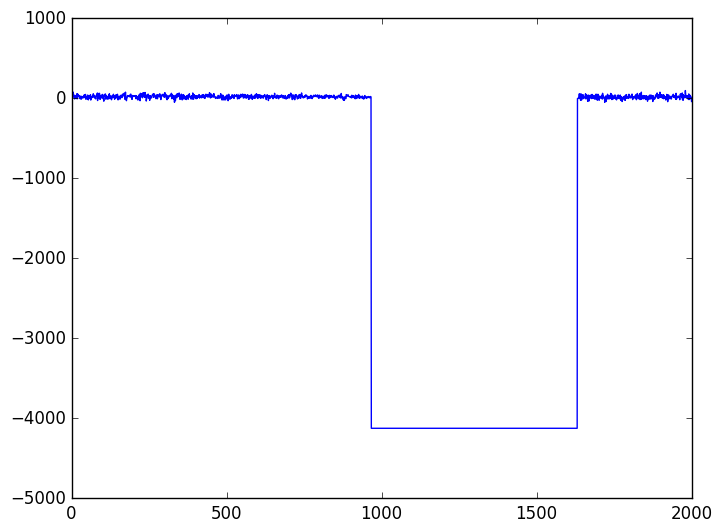

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4e84e47860>

In [104]:
plotch=lfp[5,43,:];
plot(plotch)

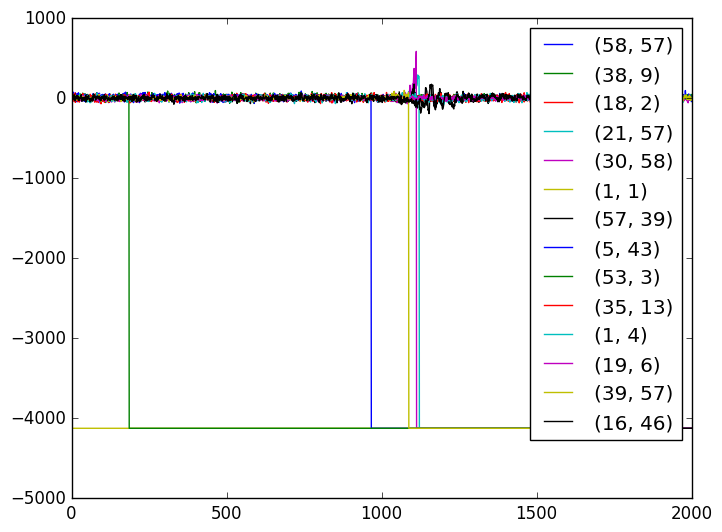

In [105]:
for x in saturados
    j=x[1]
    k=x[2]
    plotch=lfp[j,k,:]
    plot(plotch, label="($j, $k)")
end
legend()
savefig("SaturadosPorDesviacion.png",dpi=92)

In [106]:
selectos=([2,41],[13,53],[17,57],[29,61],[33,49],[41,53],[49,45],[49,37],[57,37]);
length(selectos)

9

In [107]:
etiq=("A","B","C","D","E","F","G","H","I");
length(etiq)

9

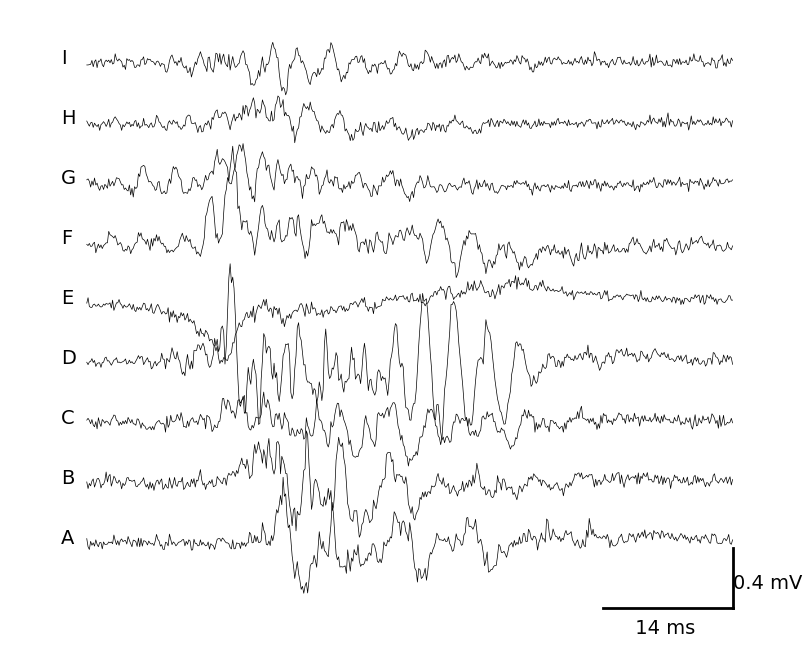

In [108]:
desplazo=400
figura=figure(figsize=(9,7.5))
axis("off")
xlim(-20,520)
for n in 1:9
    x=selectos[n]
    j=x[1]
    k=x[2]
    plotch=lfp[j,k,rango]+desplazo*(n-1)
    plot(plotch, c="black",lw=0.5)
    annotate(etiq[n], xy=(-20,desplazo*(n-1)),annotation_clip=false, fontsize=14)
end
plot([400,500],[-430,-430], lw=2, c="k")
intervalo=@sprintf("%3.0f",100/freq)
annotate("$intervalo ms",xy=(420,-600), annotation_clip=false,fontsize=14)

plot([500,500],[-430,-30],lw=2,c="k")
annotate("0.4 mV",xy=(500,-300), annotation_clip=false,fontsize=14)

savefig("TrazosEjemplares_140116s2_evento8.svg",dpi=92)

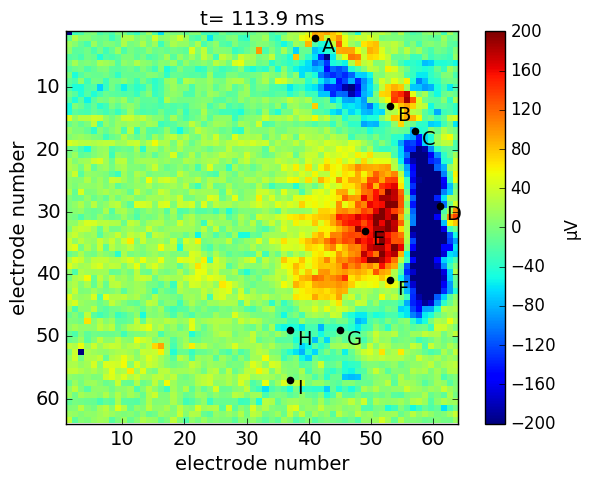

In [109]:
ion()

cuadro=1300
exemplo=lfp[:,:,cuadro];
figure(figsize=(6.5,5.0))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)
milisec=round((cuadro-500)/7.022,1)

title("t= $milisec ms")
limites=200
xlim(1,64)
ylim(64,1)

for i in 1:9
    x=selectos[i][2]
    y=selectos[i][1]
   annotate(etiq[i], (x,y), xytext=(5,-10), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(exemplo, 
interpolation="nearest", cmap="jet", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

x=[]
y=[]
for j in selectos
  append!(x,j[2])
   append!(y,j[1])
end

scatter(x,y, marker="o",c="black")

cbx=colorbar(imagen, fraction=0.045) 
cbx[:set_label]("µV")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

tight_layout()
savefig("MapaTrazosEjemplares_140116s2_evento_8.svg",dpi=90)

In [84]:
x=[]
y=[]
for j in selectos
  append!(x,j[2])
end

In [85]:
x

9-element Array{Any,1}:
 41
 53
 57
 61
 49
 53
 45
 37
 37